Importing Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Downloading the Dataset

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yeganehbavafa/vnl-men-2023")

print("Path to dataset files:", path)

/home/ak/Documents/Exploratory-Data-Analysis-EDA-/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 3.42k/3.42k [00:00<00:00, 1.80MB/s]

Extracting files...
Path to dataset files: /home/ak/.cache/kagglehub/datasets/yeganehbavafa/vnl-men-2023/versions/2


Reading the Dataset

In [4]:
df=pd.read_csv(path+"/VNL2023.csv")

View first three rows of Dataset

In [5]:
df.head(3)

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP


View Last three rows of Dataset

In [6]:
df.tail(3)

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
128,Nacsimento Maique Reis,Brazil,26,0.0,0.0,0.0,0.0,5.08,2.46,L
129,Garcia Alvarez Yonder Roman,Cuba,30,0.0,0.0,0.0,0.0,4.25,3.25,L
130,Salparov Teodor,Bulgaria,41,0.0,0.0,0.0,0.0,5.00,3.75,L


Number of rows and columns present in this Dataset

In [8]:
df.shape

(131, 10)

Lets get summary statistics of the numeric columns

In [9]:
df.describe()

,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198
std,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000
max,41.000000,15.800000,4.080000,2.080000,26.890000,11.440000,6.690000


Checking NA or None or numpy.Nan values in Dataset, it maps to True, everything else maps to False

In [10]:
df.isna()

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
126,False,False,False,False,False,False,False,False,False,False
127,False,False,False,False,False,False,False,False,False,False
128,False,False,False,False,False,False,False,False,False,False
129,False,False,False,False,False,False,False,False,False,False


Total number NA values (True) sum in column wise.

In [11]:
df.isna().sum()

Player      0
Country     0
Age         0
Attack      0
Block       0
Serve       0
Set         0
Dig         0
Receive     0
Position    0
dtype: int64

Checking for duplicate rows in the Dataset

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
126    False
127    False
128    False
129    False
130    False
Length: 131, dtype: bool

Total number of duplicated rows in the Dataset

In [13]:
df.duplicated().sum()

np.int64(0)

Getting Correlation Matrix

1 means positive relationship(either decreasing or increasing but together)

-1 means strong negative relationship(if one is decreasing other will be striclty increasing and vice versa)

In [14]:
numeric_cols=df.select_dtypes(include=["int","float"]).columns
corr_matrix=df[numeric_cols].corr()
print(corr_matrix)

              Age    Attack     Block     Serve       Set       Dig   Receive
Age      1.000000 -0.177849 -0.101040 -0.108367  0.177757  0.167141 -0.011067
Attack  -0.177849  1.000000  0.338412  0.768859 -0.430805 -0.098999  0.169892
Block   -0.101040  0.338412  1.000000  0.335954 -0.132019 -0.348347 -0.265206
Serve   -0.108367  0.768859  0.335954  1.000000 -0.154815 -0.052501  0.039642
Set      0.177757 -0.430805 -0.132019 -0.154815  1.000000  0.131659 -0.305869
Dig      0.167141 -0.098999 -0.348347 -0.052501  0.131659  1.000000  0.624733
Receive -0.011067  0.169892 -0.265206  0.039642 -0.305869  0.624733  1.000000


Heatmap to check this correlation matrix

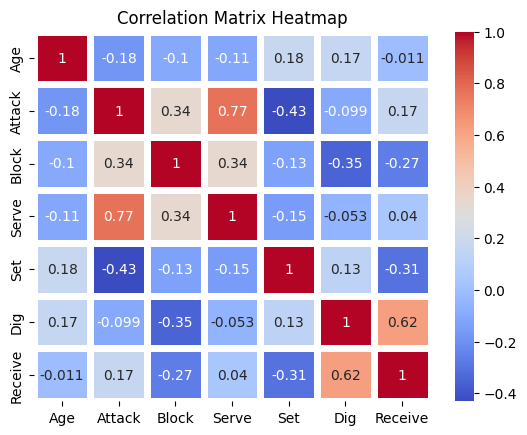

In [15]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=5)
plt.title("Correlation Matrix Heatmap")
plt.show()

Bigger version for same heatmap

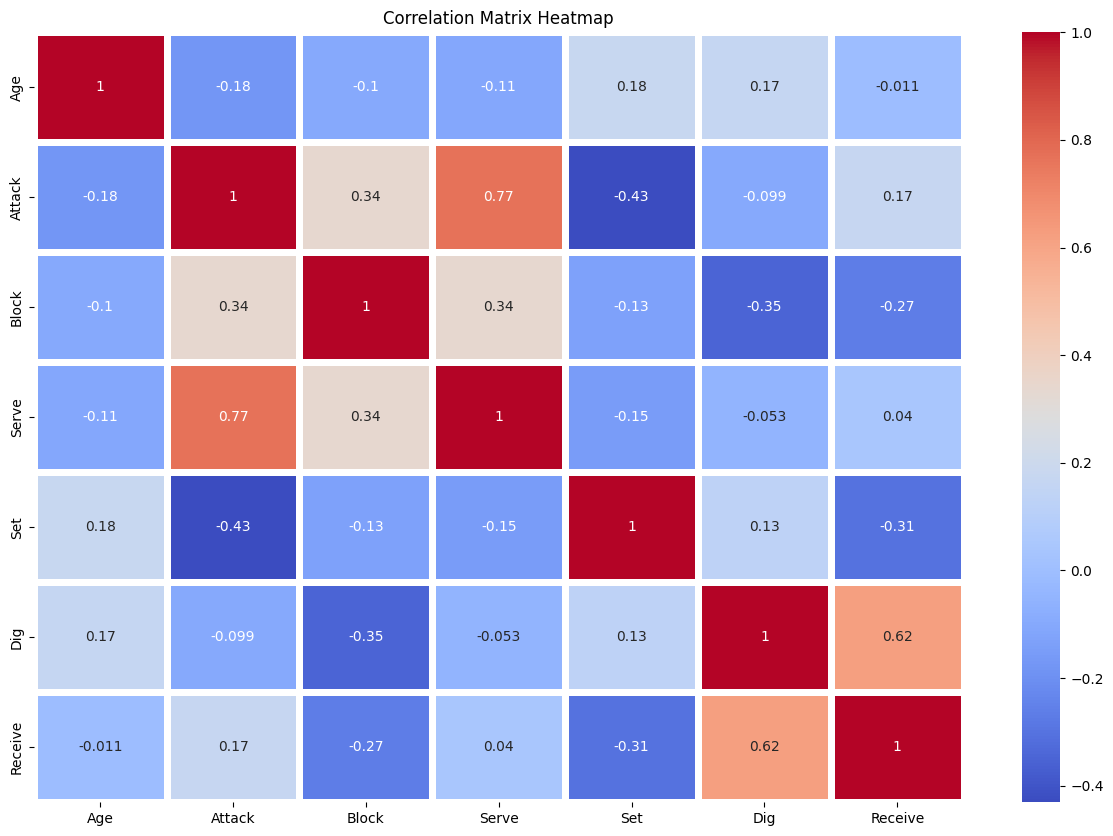

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=5)
plt.title("Correlation Matrix Heatmap")
plt.show()

Getting Value Counts for Position Column

In [20]:
position_counts=df["Position"].value_counts()
position_counts

Position
OH    42
MB    32
OP    25
S     16
L     16
Name: count, dtype: int64

Pie chart for Position Column

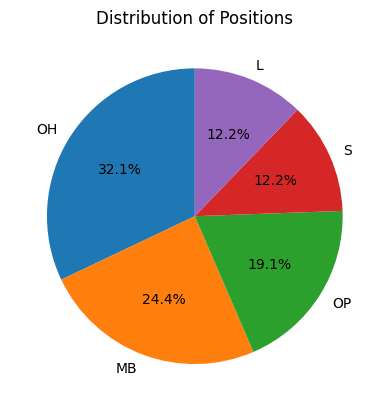

In [22]:
plt.pie(position_counts, labels=position_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Positions")
plt.show()

Average Attack by Each Country

In [23]:
df.head(1)

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.8,1.13,1.4,0.07,4.8,5.6,OH


In [28]:
average_attack_by_country = df.groupby("Country")["Attack"].mean().sort_values(ascending=False)

Least average attack by countries

In [30]:
average_attack_by_country.tail()

Country
Brazil     5.250000
China      5.093750
Germany    4.833750
Iran       4.707778
USA        4.600000
Name: Attack, dtype: float64

Most average attacks by countries

In [33]:
average_attack_by_country

Country
France       6.670000
Japan        6.595000
Cuba         6.344286
Serbia       5.998750
Italy        5.965000
Slovenia     5.961250
Argentina    5.925000
Nederland    5.880000
Poland       5.807000
Canada       5.405714
Bulgaria     5.282500
Brazil       5.250000
China        5.093750
Germany      4.833750
Iran         4.707778
USA          4.600000
Name: Attack, dtype: float64

Bar chart for Average Attack by Country

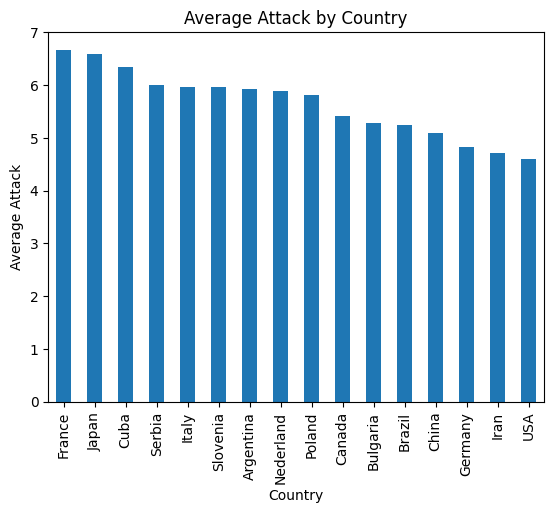

In [34]:
average_attack_by_country.plot(kind="bar")
plt.title("Average Attack by Country")
plt.xlabel("Country")
plt.ylabel("Average Attack")
plt.show()

Getting Average Serve for Each Age Group

In [35]:
df.head(1)

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.8,1.13,1.4,0.07,4.8,5.6,OH


In [36]:
average_serve_by_age_group = df.groupby("Age")["Serve"].mean()

In [39]:
sorted_average_serve_by_age_group=average_serve_by_age_group.sort_values(ascending=False)

In [40]:
sorted_average_serve_by_age_group

Age
31    0.910000
20    0.880000
21    0.770000
26    0.681053
28    0.667273
35    0.666667
27    0.662500
36    0.660000
24    0.640667
22    0.534286
23    0.526667
29    0.477500
30    0.429231
38    0.400000
33    0.321429
32    0.290000
37    0.270000
19    0.200000
25    0.165714
34    0.026667
41    0.000000
Name: Serve, dtype: float64

Maximum Attacks by Country and Position

In [44]:
df.groupby(["Country", "Position"])["Attack"].max().reset_index().sort_values(ascending=False, by="Attack")

,Country,Position,Attack
52,Japan,OH,15.80
58,Nederland,OP,15.33
33,France,OP,15.25
28,Cuba,OP,15.00
68,Serbia,OP,14.33
...,...,...,...
55,Nederland,L,0.00
70,Slovenia,L,0.00
65,Serbia,L,0.00
64,Poland,S,0.00


Total Digs by Country

In [45]:
df.groupby("Country")["Dig"].sum()

Country
Argentina    33.88
Brazil       24.61
Bulgaria     22.45
Canada       26.50
China        22.08
Cuba         20.26
France       38.59
Germany      20.92
Iran         24.25
Italy        35.89
Japan        32.38
Nederland    21.84
Poland       32.56
Serbia       30.64
Slovenia     33.85
USA          28.42
Name: Dig, dtype: float64

Scatter Plot of Block vs Receive

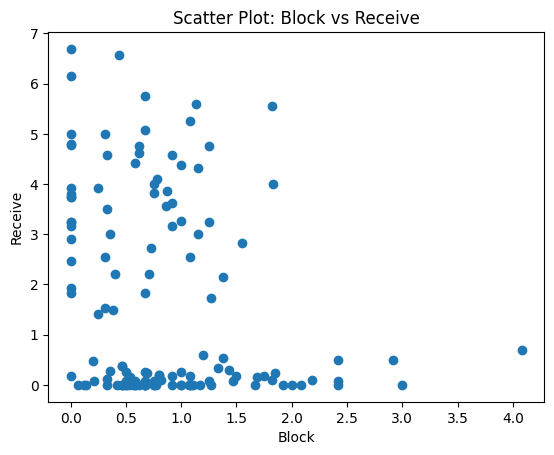

In [46]:
plt.scatter(df["Block"], df["Receive"])
plt.title("Scatter Plot: Block vs Receive")
plt.xlabel("Block")
plt.ylabel("Receive")
plt.show()

Box Plot for Serve Values

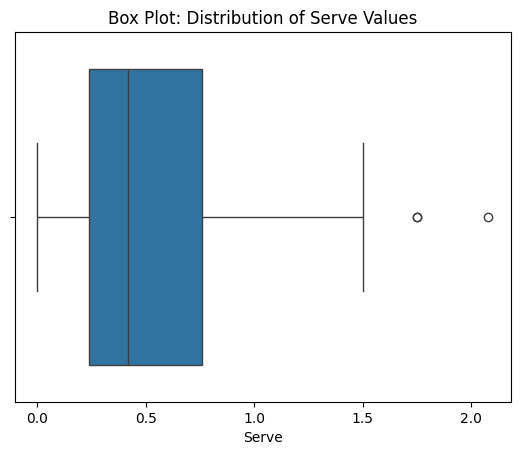

In [49]:
sns.boxplot(x=df["Serve"])
plt.title("Box Plot: Distribution of Serve Values")
plt.xlabel("Serve")
plt.show()

Histogram for Age

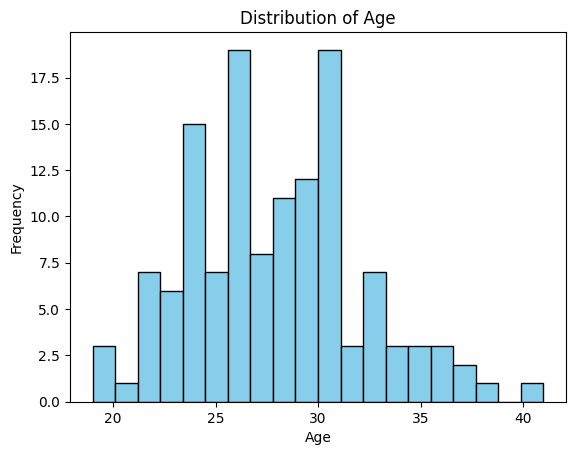

In [50]:
plt.hist(df["Age"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Average Attack by position

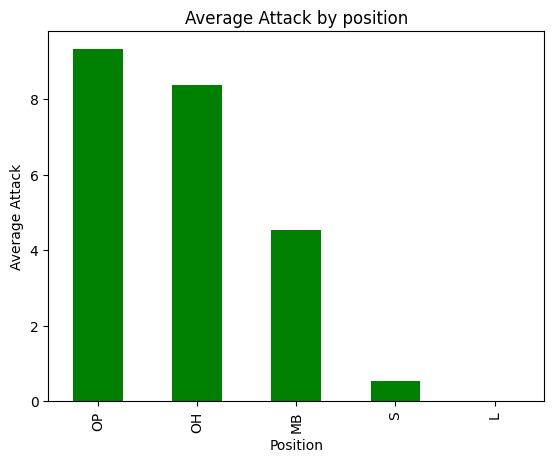

In [52]:
average_attack_by_position=df.groupby("Position")["Attack"].mean().sort_values(ascending=False)
average_attack_by_position.plot(kind="bar", color="green")
plt.title("Average Attack by position")
plt.xlabel("Position")
plt.ylabel("Average Attack")
plt.show()

Serve Trend across Age Groups

In [53]:
serve_trend_by_age = df.groupby("Age")["Serve"].mean()

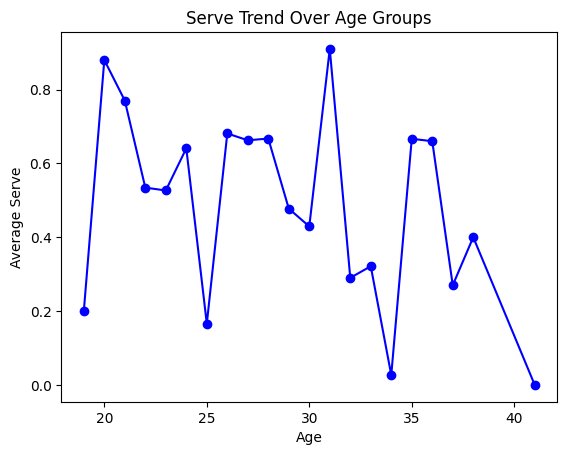

In [55]:
serve_trend_by_age.plot(kind="line", marker="o", linestyle="-", color="blue")
plt.title("Serve Trend Over Age Groups")
plt.xlabel("Age")
plt.ylabel("Average Serve")
plt.show()

Total Attack and Block by Country

In [56]:
total_attack_block_by_country = df.groupby("Country")[["Attack","Block"]].sum()

In [57]:
total_attack_block_by_country

,Attack,Block
Country,,
Argentina,47.40,8.48
Brazil,42.00,6.30
Bulgaria,42.26,5.96
Canada,37.84,5.08
China,40.75,5.66
Cuba,44.41,6.76
France,66.70,9.08
Germany,38.67,5.04
Iran,42.37,8.39


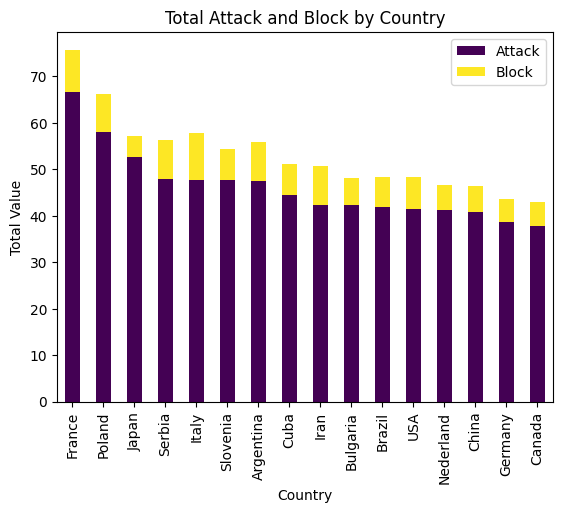

In [61]:
total_attack_block_by_country.sort_values(ascending=False, by="Attack").plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Total Attack and Block by Country")
plt.xlabel("Country")
plt.ylabel("Total Value")
plt.show()

YData Profiling

In [1]:
from ydata_profiling import ProfileReport
import numpy as np
import pandas as pd

oo = pd.read_csv("/home/ak/.cache/kagglehub/datasets/yeganehbavafa/vnl-men-2023/versions/2/VNL2023.csv", na_values='?')

In [2]:
profile = ProfileReport(oo, title="Profiling Report")

In [3]:
profile.to_file("erport.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:03<00:00,  3.32it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]